In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
path = r"C:\Users\SURESH\Inno 271-273\GenAI Internship\Project 2\dataset.csv"
df = pd.read_csv(path)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [49]:
df.shape

(112634, 17)

In [50]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [51]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['vin (1-10)', 'county', 'city', 'state', 'postal code', 'model year',
       'make', 'model', 'electric vehicle type',
       'clean alternative fuel vehicle (cafv) eligibility', 'electric range',
       'base msrp', 'legislative district', 'dol vehicle id',
       'vehicle location', 'electric utility', '2020 census tract'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   vin (1-10)                                         112634 non-null  object 
 1   county                                             112634 non-null  object 
 2   city                                               112634 non-null  object 
 3   state                                              112634 non-null  object 
 4   postal code                                        112634 non-null  int64  
 5   model year                                         112634 non-null  int64  
 6   make                                               112634 non-null  object 
 7   model                                              112614 non-null  object 
 8   electric vehicle type                              112634 non-null  object

In [53]:
df.isnull().sum()

vin (1-10)                                             0
county                                                 0
city                                                   0
state                                                  0
postal code                                            0
model year                                             0
make                                                   0
model                                                 20
electric vehicle type                                  0
clean alternative fuel vehicle (cafv) eligibility      0
electric range                                         0
base msrp                                              0
legislative district                                 286
dol vehicle id                                         0
vehicle location                                      24
electric utility                                     443
2020 census tract                                      0
dtype: int64

In [54]:
df.duplicated().sum()

0

# Handling Missing Values

In [55]:
df['legislative district'] = df['legislative district'].fillna(df['legislative district'].median())
df['vehicle location'] = df['vehicle location'].fillna(df['vehicle location'].mode()[0])
df['electric utility'] = df['electric utility'].fillna(df['electric utility'].mode()[0])

In [56]:
df.isnull().sum()

vin (1-10)                                            0
county                                                0
city                                                  0
state                                                 0
postal code                                           0
model year                                            0
make                                                  0
model                                                20
electric vehicle type                                 0
clean alternative fuel vehicle (cafv) eligibility     0
electric range                                        0
base msrp                                             0
legislative district                                  0
dol vehicle id                                        0
vehicle location                                      0
electric utility                                      0
2020 census tract                                     0
dtype: int64

In [57]:
df.shape

(112634, 17)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   vin (1-10)                                         112634 non-null  object 
 1   county                                             112634 non-null  object 
 2   city                                               112634 non-null  object 
 3   state                                              112634 non-null  object 
 4   postal code                                        112634 non-null  int64  
 5   model year                                         112634 non-null  int64  
 6   make                                               112634 non-null  object 
 7   model                                              112614 non-null  object 
 8   electric vehicle type                              112634 non-null  object

In [59]:
df.describe()

,postal code,model year,electric range,base msrp,legislative district,dol vehicle id,2020 census tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.816254,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.683387,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


# EDA - Univariate Analysis

## Categorical columns

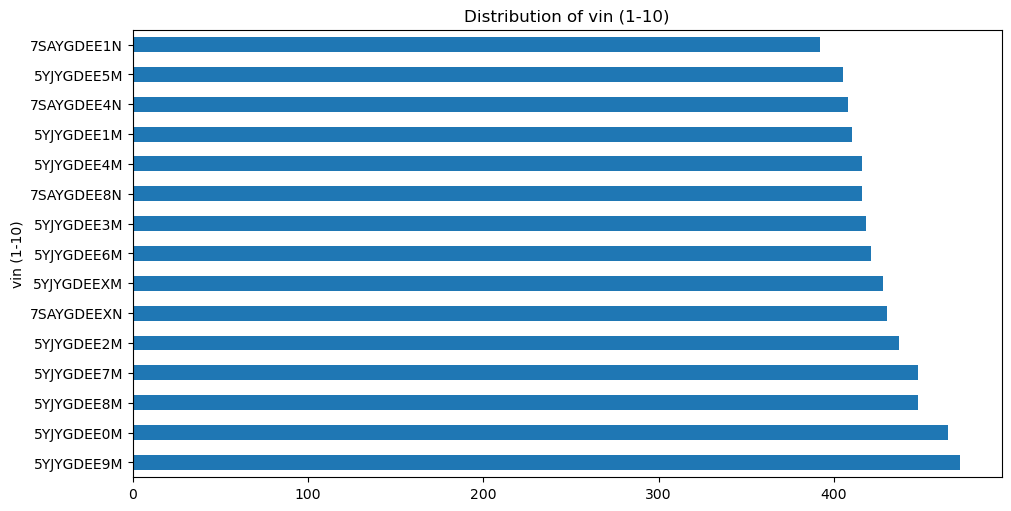

In [60]:
plt.figure(1, figsize=(10,5), layout='constrained')
df['vin (1-10)'].value_counts()[:15].plot(kind = 'barh')
plt.title('Distribution of vin (1-10)')
plt.show()

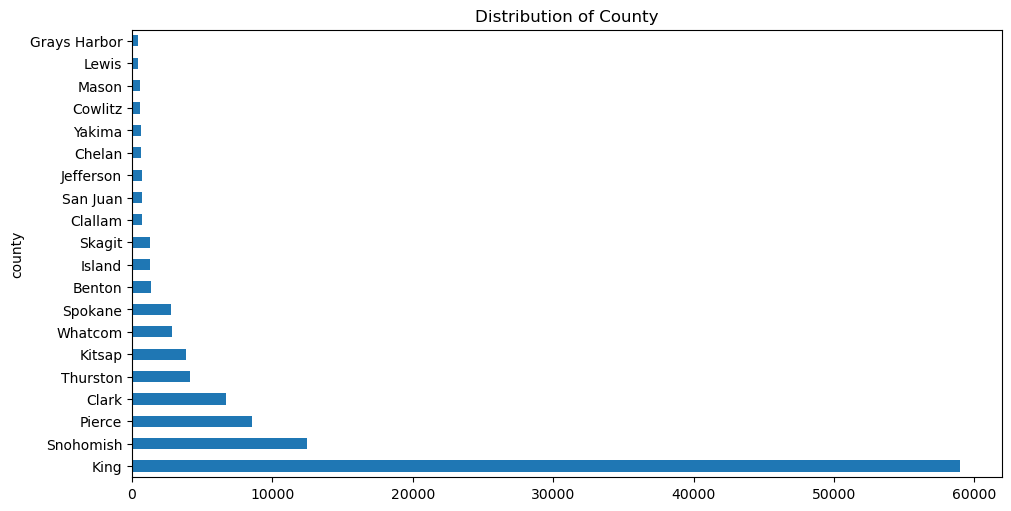

In [61]:
plt.figure(1, figsize=(10,5), layout='constrained')
df['county'].value_counts()[:20].plot(kind = 'barh')
plt.title('Distribution of County')
plt.show()

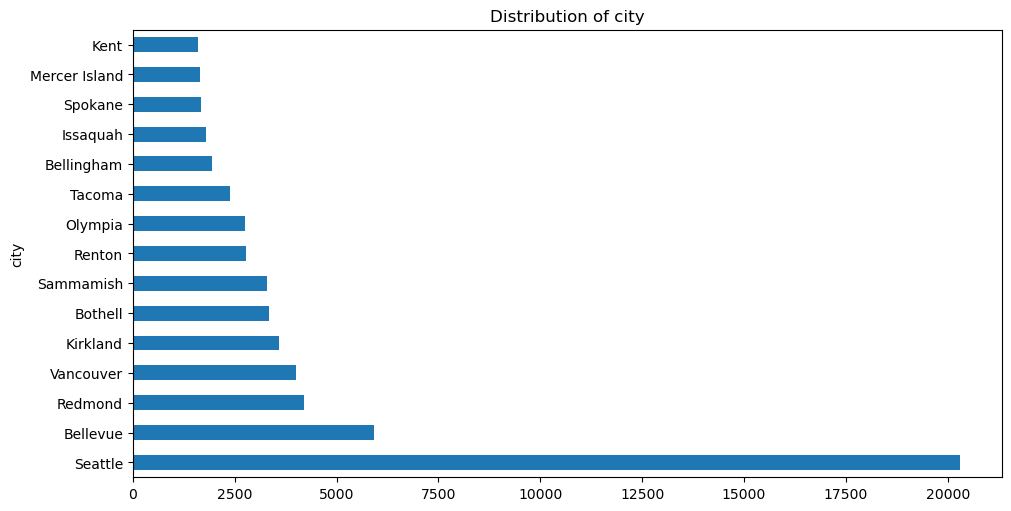

In [62]:
plt.figure(1, figsize=(10,5), layout='constrained')
df['city'].value_counts()[:15].plot(kind = 'barh')
plt.title('Distribution of city')
plt.show()

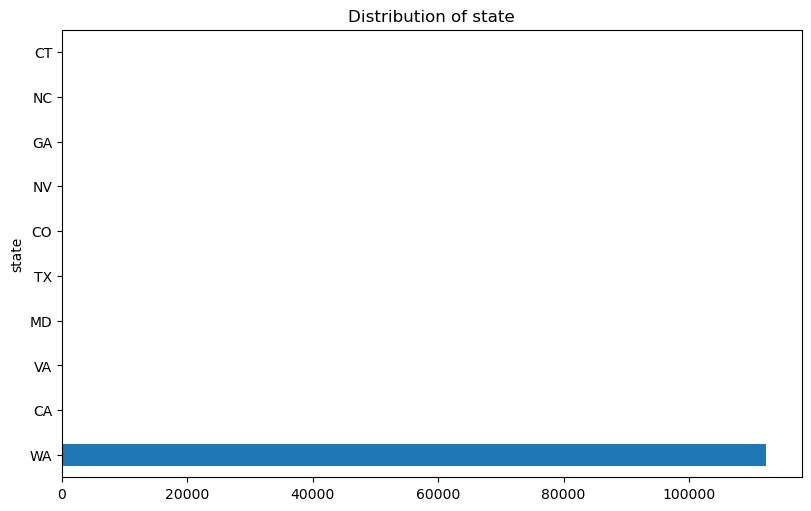

In [90]:
plt.figure(1, figsize=(8,5), layout='constrained')
df['state'].value_counts()[:10].plot(kind = 'barh')
plt.title('Distribution of state')
plt.show()

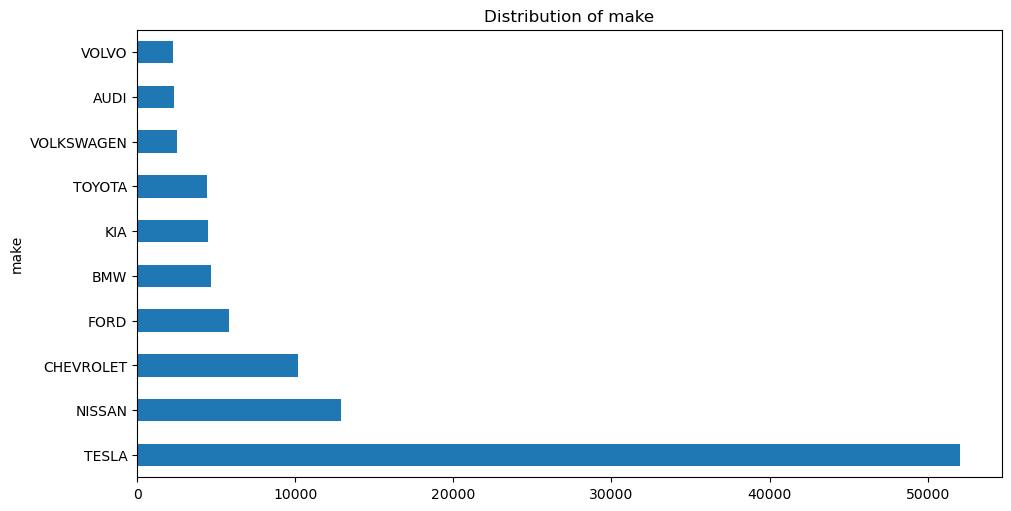

In [64]:
plt.figure(1, figsize=(10,5), layout='constrained')
df['make'].value_counts()[:10].plot(kind = 'barh')
plt.title('Distribution of make')
plt.show()

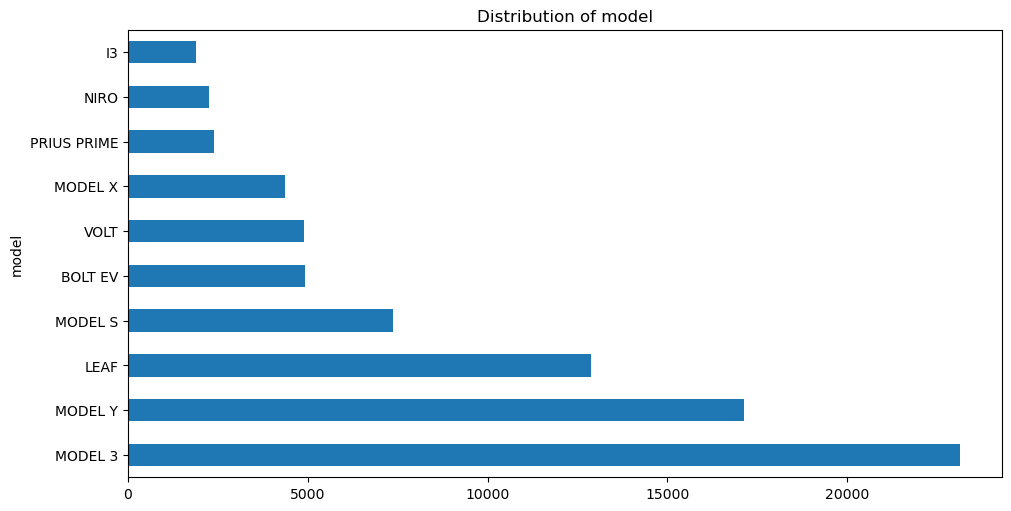

In [65]:
plt.figure(1, figsize=(10,5), layout='constrained')
df['model'].value_counts()[:10].plot(kind = 'barh')
plt.title('Distribution of model')
plt.show()

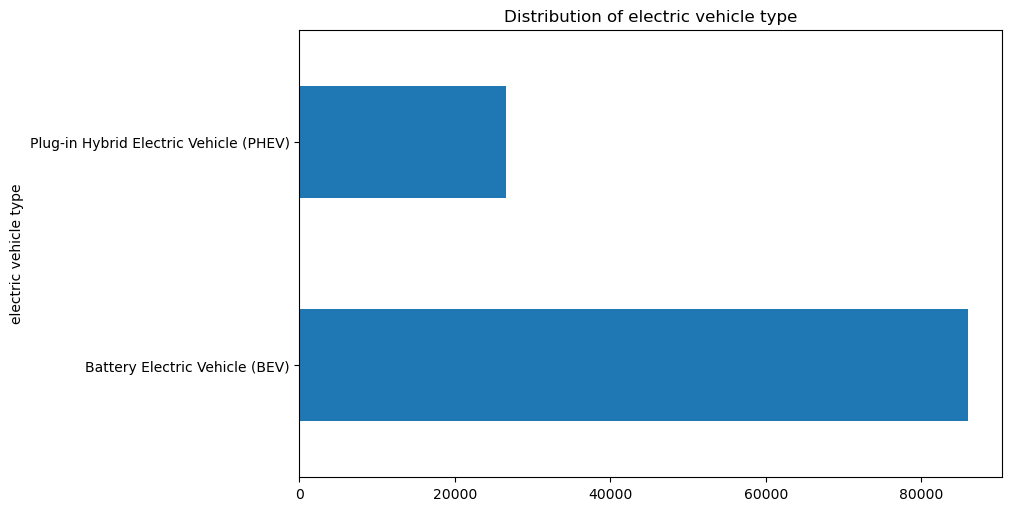

In [66]:
plt.figure(1, figsize=(10,5), layout='constrained')
df['electric vehicle type'].value_counts().plot(kind = 'barh')
plt.title('Distribution of electric vehicle type')
plt.show()

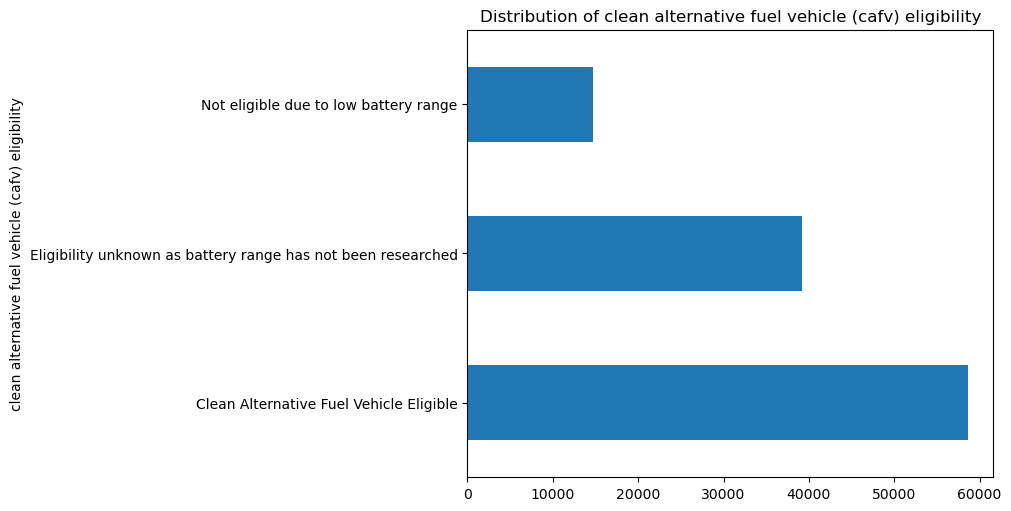

In [67]:
plt.figure(1, figsize=(10,5), layout='constrained')
df['clean alternative fuel vehicle (cafv) eligibility'].value_counts().plot(kind = 'barh')
plt.title('Distribution of clean alternative fuel vehicle (cafv) eligibility')
plt.show()

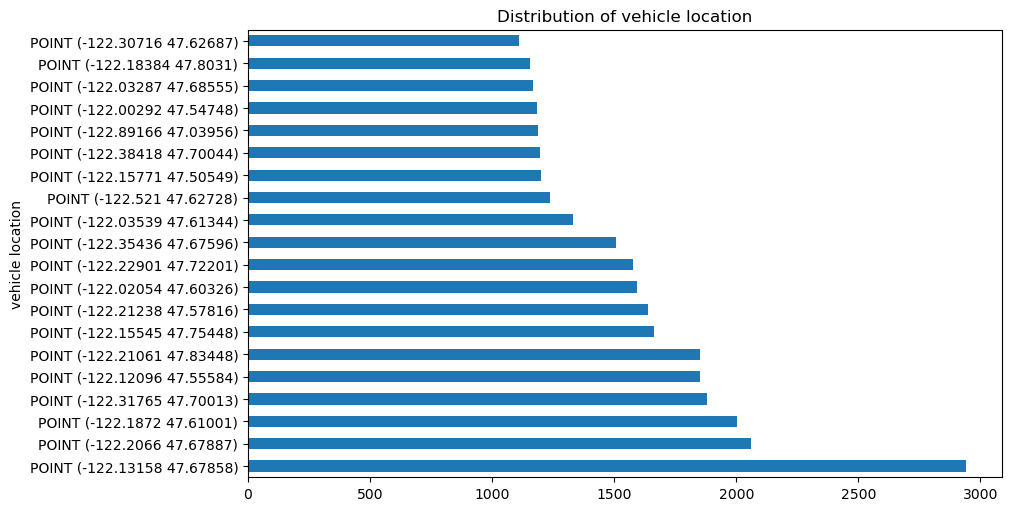

In [68]:
plt.figure(1, figsize=(10,5), layout='constrained')
df['vehicle location'].value_counts()[:20].plot(kind = 'barh')
plt.title('Distribution of vehicle location')
plt.show()

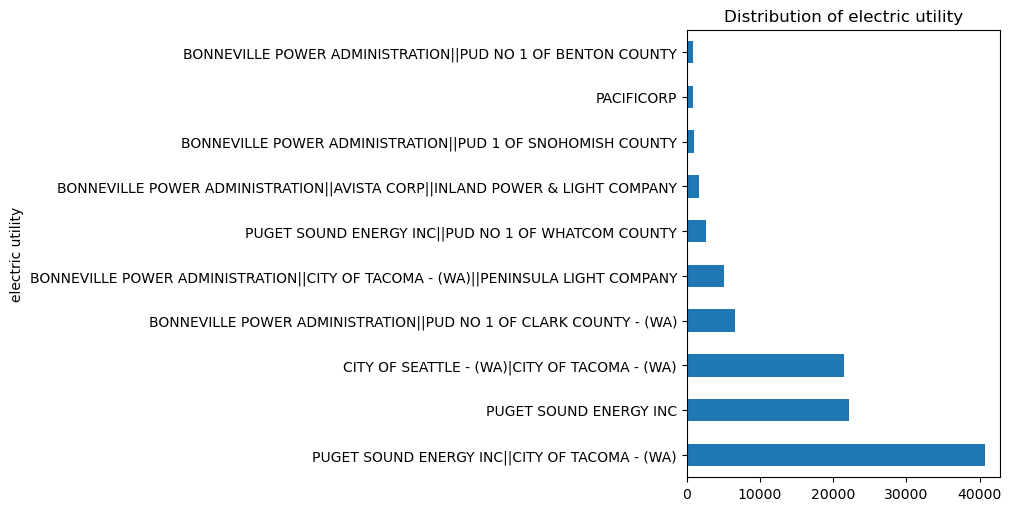

In [69]:
plt.figure(1, figsize=(10,5), layout='constrained')
df['electric utility'].value_counts()[:10].plot(kind = 'barh')
plt.title('Distribution of electric utility')
plt.show()

## Numerical Columns

In [70]:
df.dtypes

vin (1-10)                                            object
county                                                object
city                                                  object
state                                                 object
postal code                                            int64
model year                                             int64
make                                                  object
model                                                 object
electric vehicle type                                 object
clean alternative fuel vehicle (cafv) eligibility     object
electric range                                         int64
base msrp                                              int64
legislative district                                 float64
dol vehicle id                                         int64
vehicle location                                      object
electric utility                                      object
2020 census tract       

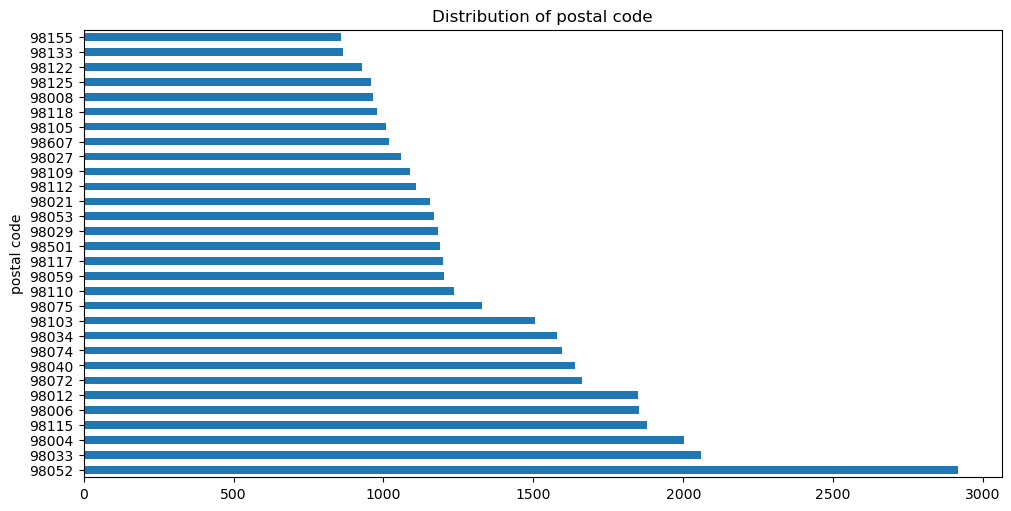

In [71]:
plt.figure(1, figsize=(10,5), layout='constrained')
df['postal code'].value_counts()[:30].plot(kind = 'barh')
plt.title('Distribution of postal code')
plt.show()

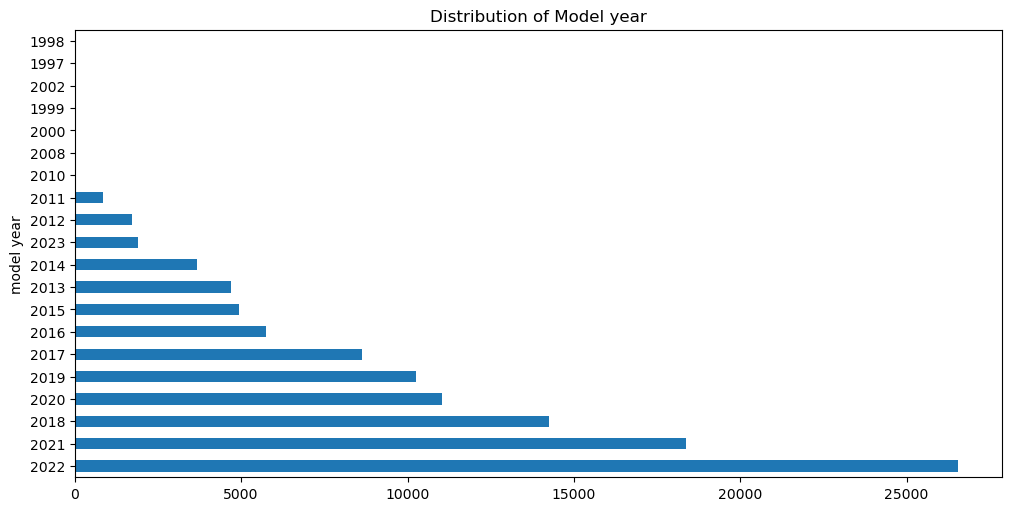

In [72]:
plt.figure(1, figsize=(10,5), layout='constrained')
df['model year'].value_counts().plot(kind = 'barh')
plt.title('Distribution of Model year')
plt.show()

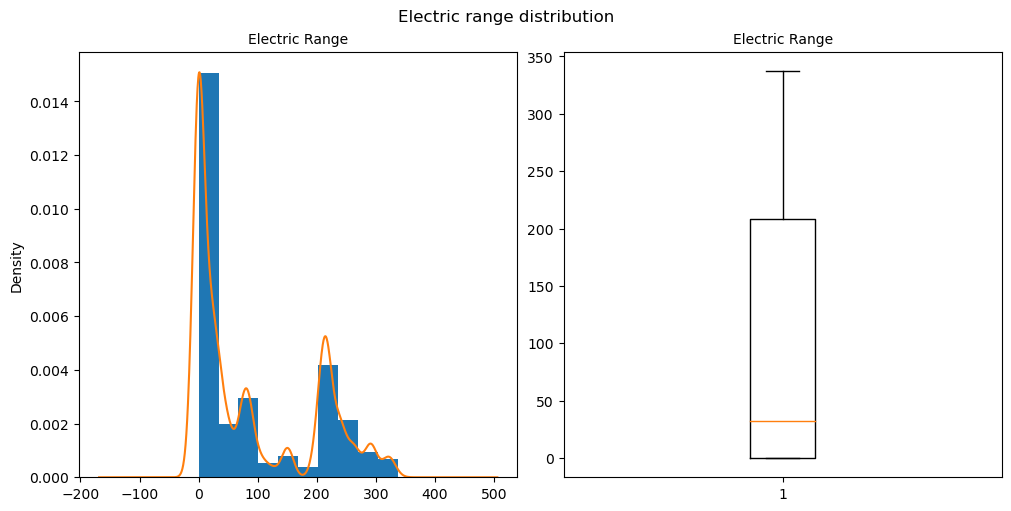

In [73]:
fig, axs = plt.subplots(1,2, figsize= (10,5), layout= 'constrained')
fig.suptitle('Electric range distribution')

axs[0].hist(df['electric range'], density=True)
df['electric range'].plot(kind = 'kde', ax = axs[0])
axs[0].set_title('Electric Range', fontsize = 'medium')

axs[1].boxplot(df['electric range'])
axs[1].set_title('Electric Range', fontsize = 'medium')

plt.show()

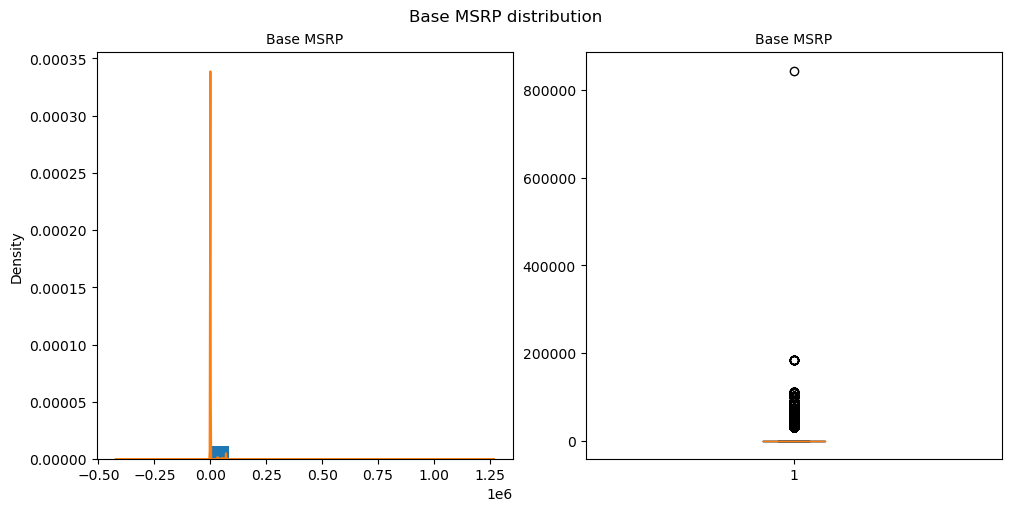

In [74]:
fig, axs = plt.subplots(1,2, figsize= (10,5), layout= 'constrained')
fig.suptitle('Base MSRP distribution')

axs[0].hist(df['base msrp'], density=True)
df['base msrp'].plot(kind = 'kde', ax = axs[0])
axs[0].set_title('Base MSRP', fontsize = 'medium')

axs[1].boxplot(df['base msrp'])
axs[1].set_title('Base MSRP', fontsize = 'medium')

plt.show()

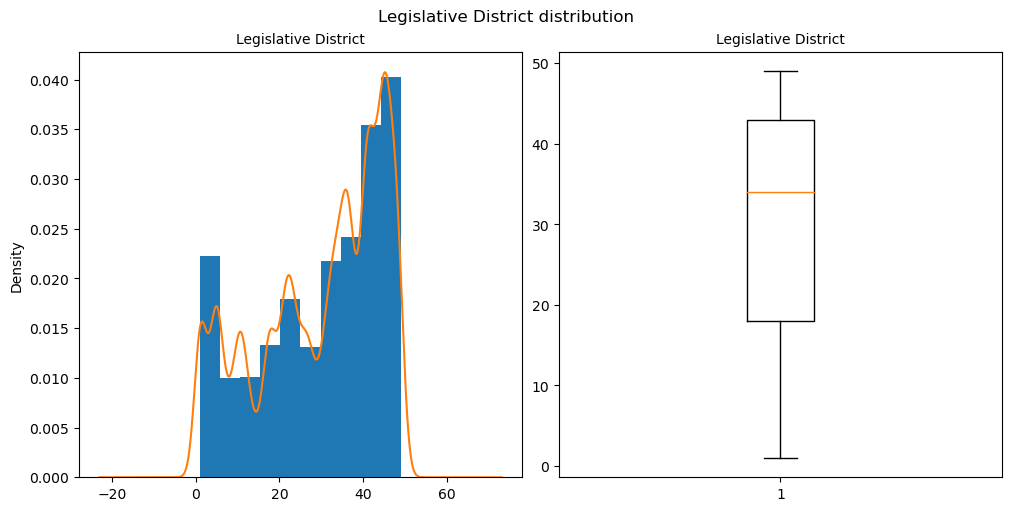

In [75]:
fig, axs = plt.subplots(1,2, figsize= (10,5), layout= 'constrained')
fig.suptitle('Legislative District distribution')

axs[0].hist(df['legislative district'], density=True)
df['legislative district'].plot(kind = 'kde', ax = axs[0])
axs[0].set_title('Legislative District', fontsize = 'medium')

axs[1].boxplot(df['legislative district'])
axs[1].set_title('Legislative District', fontsize = 'medium')

plt.show()

# EDA - Bivariate Analysis

In [76]:
df.head()

,vin (1-10),county,city,state,postal code,model year,make,model,electric vehicle type,clean alternative fuel vehicle (cafv) eligibility,electric range,base msrp,legislative district,dol vehicle id,vehicle location,electric utility,2020 census tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,34.0,198968248,POINT (-81.80023 24.5545),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,5204412,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


## Numerical vs Numerical

C:\Users\SURESH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



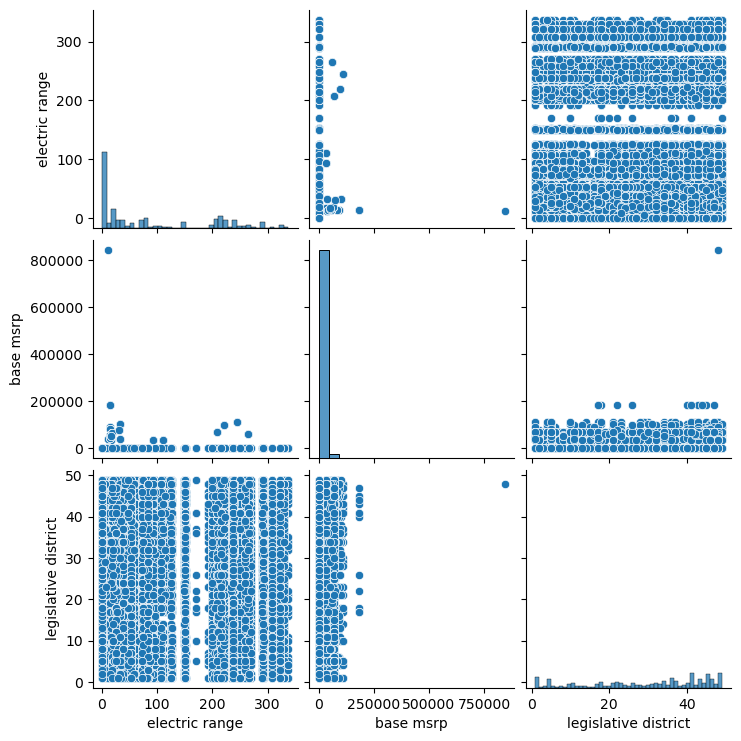

In [77]:
sns.pairplot(df.loc[:, 'electric range':'legislative district'])

## Numerical vs Categorical

In [78]:
df.groupby('electric vehicle type')['electric range'].agg(['count', 'min', 'max', 'median', 'mean'])

,count,min,max,median,mean
electric vehicle type,,,,,
Battery Electric Vehicle (BEV),86044,0,337,76.0,105.369671
Plug-in Hybrid Electric Vehicle (PHEV),26590,6,153,25.0,31.000376


In [79]:
df.groupby('make')['electric range'].agg(['count', 'min', 'max', 'median', 'mean'])

,count,min,max,median,mean
make,,,,,
AUDI,2332,0,222,18.0,62.876930
AZURE DYNAMICS,7,56,56,56.0,56.000000
BENTLEY,3,17,21,18.0,18.666667
BMW,4680,0,153,30.0,46.657479
CADILLAC,108,31,40,37.0,35.537037
CHEVROLET,10182,0,259,53.0,109.766549
CHRYSLER,1794,32,33,32.0,32.361204
FIAT,822,84,87,87.0,85.624088
FISKER,20,33,33,33.0,33.000000


In [80]:
df.groupby('model')['electric range'].agg(['count', 'min', 'max', 'median', 'mean'])

,count,min,max,median,mean
model,,,,,
330E,303,14,22,14.0,16.778878
500,822,84,87,87.0,85.624088
530E,323,14,21,15.0,15.349845
740E,30,14,14,14.0,14.000000
745E,7,16,16,16.0,16.000000
...,...,...,...,...,...
X3,292,17,17,17.0,17.000000
X5,1407,13,30,30.0,23.855721
XC40,495,0,0,0.0,0.000000


## Categorical vs Categorical

<Axes: ylabel='make'>

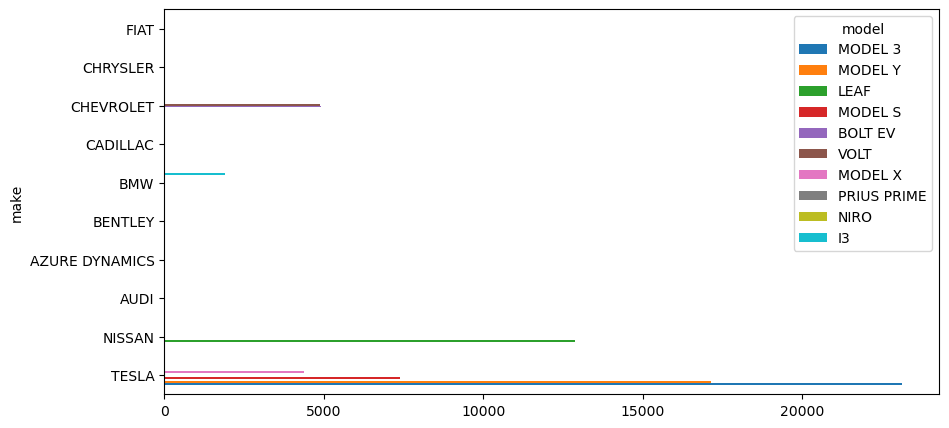

In [81]:
d = pd.crosstab(df['make'], df['model'])
models = d.sum().sort_values(ascending=False)[:10].index
filtered = d[models].sort_values(by=['MODEL 3', 'MODEL Y', 'LEAF'], ascending=[False,False,False])[:10]
filtered.plot(kind = 'barh', figsize = (10,5))

<Axes: ylabel='make'>

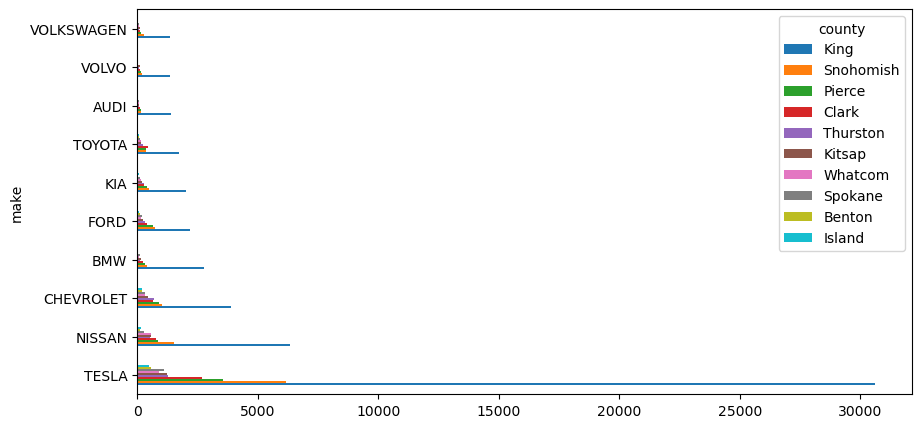

In [82]:
d = pd.crosstab(df['make'], df['county'])
models = d.sum().sort_values(ascending=False)[:10].index
filtered = d[models].sort_values(by=['King', 'Snohomish', 'Pierce'], ascending=[False,False,False])[:10]
filtered.plot(kind = 'barh', figsize = (10,5))

<Axes: ylabel='make'>

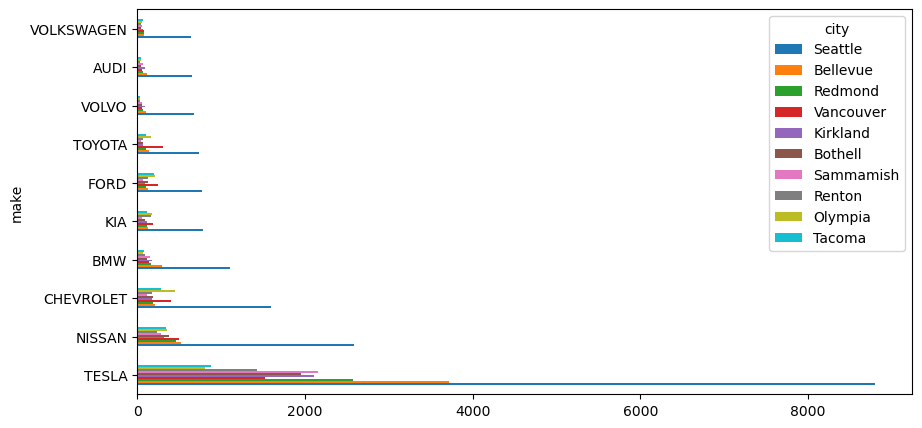

In [83]:
d = pd.crosstab(df['make'], df['city'])
models = d.sum().sort_values(ascending=False)[:10].index
filtered = d[models].sort_values(by=['Seattle', 'Bellevue', 'Redmond'], ascending=[False,False,False])[:10]
filtered.plot(kind = 'barh', figsize = (10,5))

In [84]:
df['city'].value_counts()

city
Seattle         20305
Bellevue         5921
Redmond          4201
Vancouver        4013
Kirkland         3598
                ...  
Hartline            1
Gaithersburg        1
El Paso             1
Klickitat           1
Worley              1
Name: count, Length: 629, dtype: int64

### Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [85]:
# ! pip install plotly

In [86]:
import plotly.express as px

In [93]:
location = df['state'].value_counts().reset_index()
location.head()

,state,count
0,WA,112348
1,CA,76
2,VA,36
3,MD,26
4,TX,14


In [95]:
fig = px.choropleth(location,
                   locations='state',
                   locationmode='USA-states',
                   color='count',
                   color_continuous_scale=px.colors.sequential.Blues,
                   scope='usa')

fig.show()

### Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [98]:
count_of_cars = df.groupby(['model year', 'make']).size().reset_index(name='count')
count_of_cars.head()

,model year,make,count
0,1997,CHEVROLET,1
1,1998,FORD,1
2,1999,FORD,3
3,2000,FORD,10
4,2002,TOYOTA,2


In [102]:
# ! pip install bar-chart-race

In [100]:
fig = px.bar(count_of_cars, x='count', y='make', 
             color='count', 
             text='count',
             animation_frame='model year',
             orientation='h',
             labels={'count':'No.of sales', 'year':'Year'},
             range_x=[0, count_of_cars['count'].max()*1.1],
             height=500,
             title='Year wise sales of Each EV Maker'
            )

fig.show()